In [12]:
MovingAveDays = 5 #adjust this as desired...

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("notebook", font_scale = 1.1)

In [182]:
#get the data from CSSE at Johns Hopkins University's Github
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Set up continents

In [183]:
#countries in continents - adjust as needed
Africa = ['Algeria', 'Canary Islands ', 'Ceuta ', 'Egypt', 'Libya', 'Madeira ', 'Melilla ',
        'Morocco', 'Sudan', 'Tunisia', 'Western Sahara', 'Burundi', 'Comoros', 'Djibouti',
        'Eritrea', 'Ethiopia', 'French Southern and Antarctic Lands ', 'Kenya', 'Madagascar',
        'Malawi', 'Mauritius', 'Mayotte ', 'Mozambique', 'Réunion ', 'Rwanda', 'Seychelles',
        'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Angola', 'Cameroon',
        'Central African Republic', 'Chad', 'Republic of the Congo',
        'Congo (Brazzaville)', 'Congo (Kinshasa)','Equatorial Guinea', 'Gabon',
        'São Tomé and Príncipe', 'Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'Zambia',
        'Zimbabwe', 'South Africa', 'Benin', 'Burkina Faso', 'Cape Verde', 'Gambia, The',
        'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Liberia', 'Mali', 'Mauritania',
        'Niger', 'Nigeria', 'Saint Helena, Ascension and Tristan da Cunha ', 'Senegal',
        'Sierra Leone', 'Togo', 'Cabo Verde', "Cote d'Ivoire",'Mayotte','The Gambia',
         'Gambia']
Asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei',
        'Cambodia', 'China', 'Cyprus', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran',
        'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos',
        'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Korea, North',
        'Oman', 'Pakistan', 'Palestine', 'Papua New Guinea', 'Philippines', 'Qatar', 'Russia',
        'Saudi Arabia', 'Singapore', 'Korea, South', 'Sri Lanka', 'Syria', 'Taiwan*',
        'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
        'Uzbekistan', 'Vietnam', 'Yemen', 'Cruise Ship','Timor-Leste','Diamond Princess',
        'West Bank and Gaza','Burma']
Europe = ['Albania', 'Andorra', 'Armenia ', 'Austria', 'Azerbaijan ', 'Belarus', 'Belgium',
        'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus ', 'Czech Republic',
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia ', 'Germany', 'Greece',
        'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein',
        'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
        'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia ', 'San Marino',
        'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
        'Ukraine', 'United Kingdom', 'Holy See', 'Czechia', 'Kosovo','Guernsey','Jersey']
OtherNorthAmerica = ['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas, The', 'Barbados',
        'Belize', 'Bermuda', 'Bonaire', 'British Virgin Islands', 'Canada', 'Cayman Islands',
        'Clipperton Island', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic',
        'El Salvador', 'Federal Dependencies of Venezuela', 'Greenland', 'Grenada',
        'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico',
        'Montserrat', 'Nicaragua', 'Nueva Esparta', 'Panama', 'Puerto Rico', 'Saba',
        'San Andrés and Providencia', 'Saint Barthélemy', 'Saint Kitts and Nevis',
        'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miquelon',
        'Saint Vincent and the Grenadines', 'Sint Eustatius', 'Sint Maarten',
        'Trinidad and Tobago', 'Turks and Caicos Islands',
        'United States Virgin Islands','The Bahamas','Bahamas','MS Zaandam']
#adding cruise ships where they are located during pandemic
Oceania = ['Ashmore and Cartier Islands ', 'Australia', 'Coral Sea Islands ', 'New Zealand',
        'Norfolk Island ', 'Australasia', 'Fiji', 'New Caledonia ', 'Papua ', 'West Papua ',
        'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Melanesia',
        'Federated States of Micronesia', 'Guam ', 'Kiribati', 'Marshall Islands', 'Nauru',
        'Northern Mariana Islands ', 'Palau', 'Wake Island ', 'Micronesia', 'American Samoa ',
        'Cook Islands ', 'Easter Island ', 'French Polynesia ', 'Hawaii ', 'Niue ',
        'Pitcairn Islands ', 'Samoa', 'Tokelau ', 'Tonga', 'Tuvalu', 'Wallis and Futuna','Reunion',
        'Guam']
SouthAmerica = ['Argentina', 'Bolivia', 'Bouvet Island', 'Brazil', 'Chile', 'Colombia',
        'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru',
        'South Georgia and the South Sandwich Islands', 'Suriname', 'Uruguay', 'Venezuela']
US = ['US']
Antarctica = ['Antarctica']

In [184]:
#function to check which continent a country is in based on the above
def check_continent(country):
    if country in Africa:
        continent = 'Africa'
    elif country in Antarctica:
        continent = 'Antarctica'
    elif country in Asia:
        continent = 'Asia'
    elif country in Europe:
        continent = 'Europe'
    elif country in OtherNorthAmerica:
        continent = 'Other North America'
    elif country in Oceania:
        continent = 'Oceania'
    elif country in SouthAmerica:
        continent = 'South America'
    elif country in US:
        continent = 'USA'
    else:
        continent = 'Other'
    return continent

In [185]:
#run this to check latest list - if anything appears in output, then add to the countries listed to appropriate continent mappings above
for i in confirmed['Country/Region']:
    if check_continent(i) == 'Other':
        print(i)

In [186]:
#add continent to the data
confirmed['Continent'] = confirmed.apply(lambda x: check_continent(x['Country/Region']), axis=1)
deaths['Continent'] = deaths.apply(lambda x: check_continent(x['Country/Region']), axis=1)
recoveries['Continent'] = recoveries.apply(lambda x: check_continent(x['Country/Region']), axis=1)

C = confirmed.drop(confirmed.columns[[0,1,2,3]], axis = 1)
D = deaths.drop(deaths.columns[[0,1,2,3]], axis = 1)
R = recoveries.drop(recoveries.columns[[0,1,2,3]], axis = 1)
#sum up values to 1 value per day per country
C2 = C.groupby('Continent').sum().transpose()
D2 = D.groupby('Continent').sum().transpose()
R2 = R.groupby('Continent').sum().transpose()
#parse the datetime fields
C2.index = pd.to_datetime(C2.index)
D2.index = pd.to_datetime(D2.index)
R2.index = pd.to_datetime(R2.index)

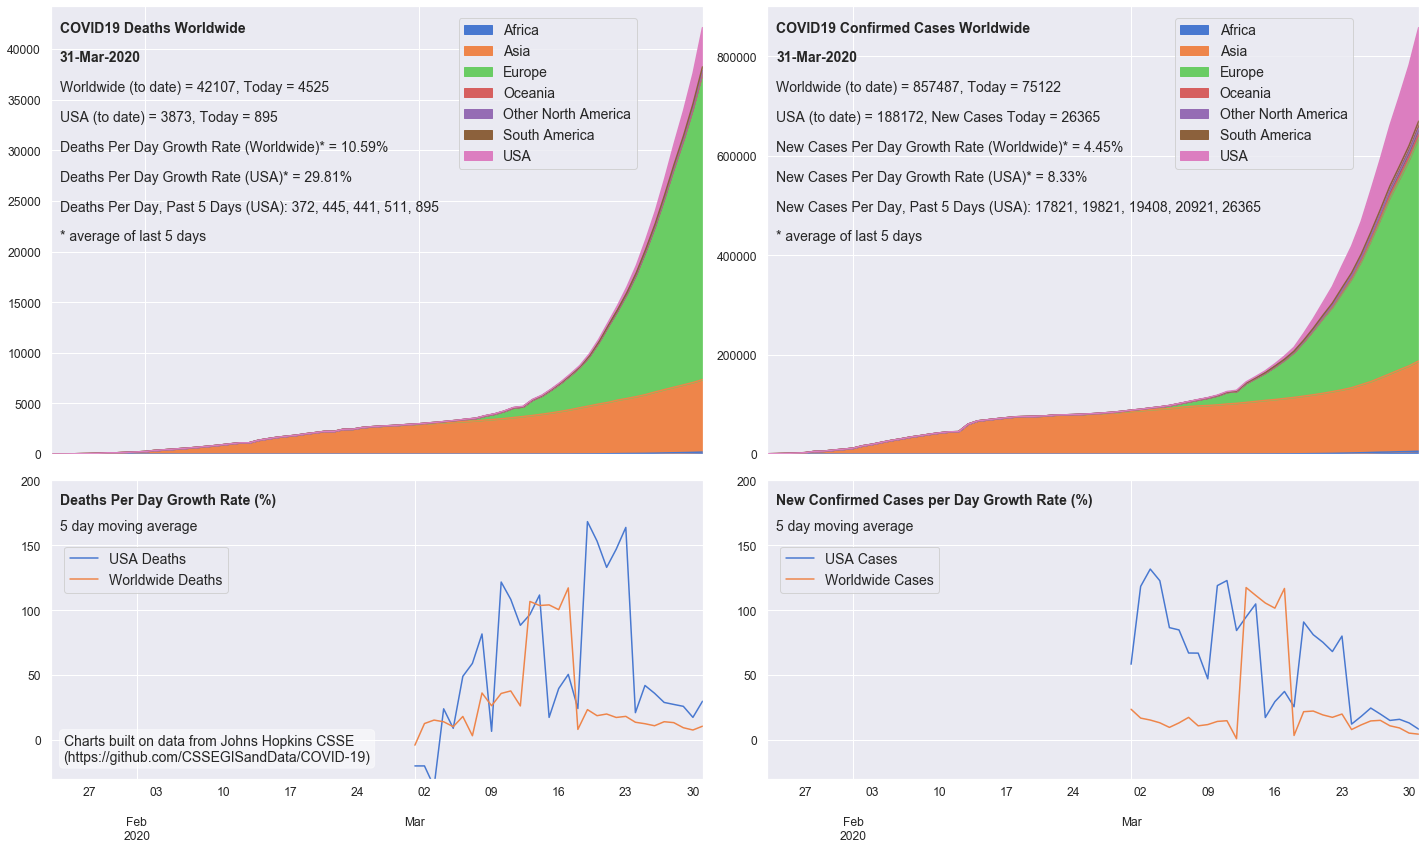

In [187]:
#new area plot

#Prettier plot with aligned x-axes between top and bottom charts, but shield pre-march growth rates since they are noisy
#also, show by continent

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale = 1.1)

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1.5, 1]})

#latest date in data set
Date = D2.index[-1] 

#Set up the data - deaths
#total number of deaths worldwide, up to the latest date in the data set
WWDeathsToDate = D2.iloc[-1,:].sum() 
#WW deaths per day
WWDeathsPerDay = D2.sum(axis=1)[1:] - D2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWDeathsPerDayGrowthRateMA = WWDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#total US deaths to latest date
USDeathsToDate = D2['USA'][-1] 
#US deaths per day
USDeathsPerDay = D2['USA'][1:] - D2['USA'][:-1].values
#latest US death per day growth rate with moving average
USNewDeathsPerDayGrowthMA = USDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#deaths last 5 days
L5D = USDeathsPerDay[-5:]

#Set up the data - confirmed cases
#total number of confirmed cases worldwide, up to the latest date in the data set
WWCasesToDate = C2.iloc[-1,:].sum() 
#WW new cases per day
WWNewCasesPerDay = C2.sum(axis=1)[1:] - C2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWNewCasesPerDayGrowthRateMA = WWNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#total US confirmed cases to latest date
USCasesToDate = C2['USA'][-1] 
#US confirmed new cases per day
USNewCasesPerDay = C2['USA'][1:] - C2['USA'][:-1].values #new cases per day
#latest US new confirmed cases per day growth rate over moving average
USNewCasesPerDayGrowthMA = USNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US confirmed cases daily growth rate based on moving average
#cases last 5 days
L5C = USNewCasesPerDay[-5:]

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
D2.plot(kind='area', ax=axarr1)
axarr1.legend(loc='upper right', bbox_to_anchor=(0.91, 0.99), shadow=False, ncol=1, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate, "COVID19 Deaths Worldwide", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr1.text(D2.index[1], WWDeathsToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr1.text(D2.index[1], WWDeathsToDate*.86, "Worldwide (to date) = " + str(WWDeathsToDate) + ", Today = " + str(WWDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.79, "USA (to date) = " + str(USDeathsToDate) + ", Today = " + str(USDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.72, "Deaths Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(WWDeathsPerDayGrowthRateMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.65, "Deaths Per Day Growth Rate (USA)* = " + "{:.2f}".format(USNewDeathsPerDayGrowthMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.58, "Deaths Per Day, Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5D[-5],L5D[-4],L5D[-3],L5D[-2],L5D[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot stacked area chart of confirmed cases
C2.plot(kind='area', ax=axarr2)
axarr2.legend(loc='upper right', bbox_to_anchor=(0.91, 0.99), shadow=False, ncol=1, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate, "COVID19 Confirmed Cases Worldwide", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr2.text(C2.index[2], WWCasesToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr2.text(C2.index[2], WWCasesToDate*.86, "Worldwide (to date) = " + str(WWCasesToDate) + ", Today = " + str(WWNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.79, "USA (to date) = " + str(USCasesToDate) + ", New Cases Today = " + str(USNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.72, "New Cases Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(WWNewCasesPerDayGrowthRateMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.65, "New Cases Per Day Growth Rate (USA)* = " + "{:.2f}".format(USNewCasesPerDayGrowthMA[-1]) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.58, "New Cases Per Day, Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5C[-5],L5C[-4],L5C[-3],L5C[-2],L5C[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot death growth rate over time (based on moving agerage)
USNewDeathsPerDayGrowthMAcleaner = USNewDeathsPerDayGrowthMA #don't show growth data before March 1 since messy
USNewDeathsPerDayGrowthMAcleaner[0:38]=None
USNewDeathsPerDayGrowthMAcleaner.plot.line(ax=axarr3,label="USA Deaths")
WWDeathsPerDayGrowthRateMA[38:].plot.line(ax=axarr3,label="Worldwide Deaths")
axarr3.text(USNewDeathsPerDayGrowthMA.index[1], 185, 'Deaths Per Day Growth Rate (%)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr3.text(USNewDeathsPerDayGrowthMA.index[1], 165, str(MovingAveDays) + ' day moving average', ha="left", va="center", rotation=0, fontsize=14)
axarr3.set_ylim([-30,200])
axarr3.legend(loc='lower left', bbox_to_anchor=(0.01, 0.6), shadow=False, ncol=1, fontsize=14)
axarr1.get_shared_x_axes().join(axarr1, axarr3)
axarr2.get_shared_x_axes().join(axarr2, axarr4)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
datatext="Charts built on data from Johns Hopkins CSSE\n(https://github.com/CSSEGISandData/COVID-19)"
axarr3.text(0.02, 0.05, datatext, transform=axarr3.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)

#plot confirmed cases growth rate over time (based on moving agerage)
USNewCasesPerDayGrowthMAcleaner = USNewCasesPerDayGrowthMA #don't show growth data before March 1 since messy
USNewCasesPerDayGrowthMAcleaner[0:38]=None
USNewCasesPerDayGrowthMA.plot.line(ax=axarr4,label="USA Cases")
WWNewCasesPerDayGrowthRateMA[38:].plot.line(ax=axarr4,label="Worldwide Cases")
axarr4.text(USNewCasesPerDayGrowthMA.index[1], 185, 'New Confirmed Cases per Day Growth Rate (%)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr4.text(USNewDeathsPerDayGrowthMA.index[1], 165, str(MovingAveDays) + ' day moving average', ha="left", va="center", rotation=0, fontsize=14)
axarr4.set_ylim([-30,200])
axarr4.legend(loc='lower left', bbox_to_anchor=(0.01, 0.6), shadow=False, ncol=1, fontsize=14)

plt.tight_layout()

fig.savefig('charts/20200331-covid19-chart.png')

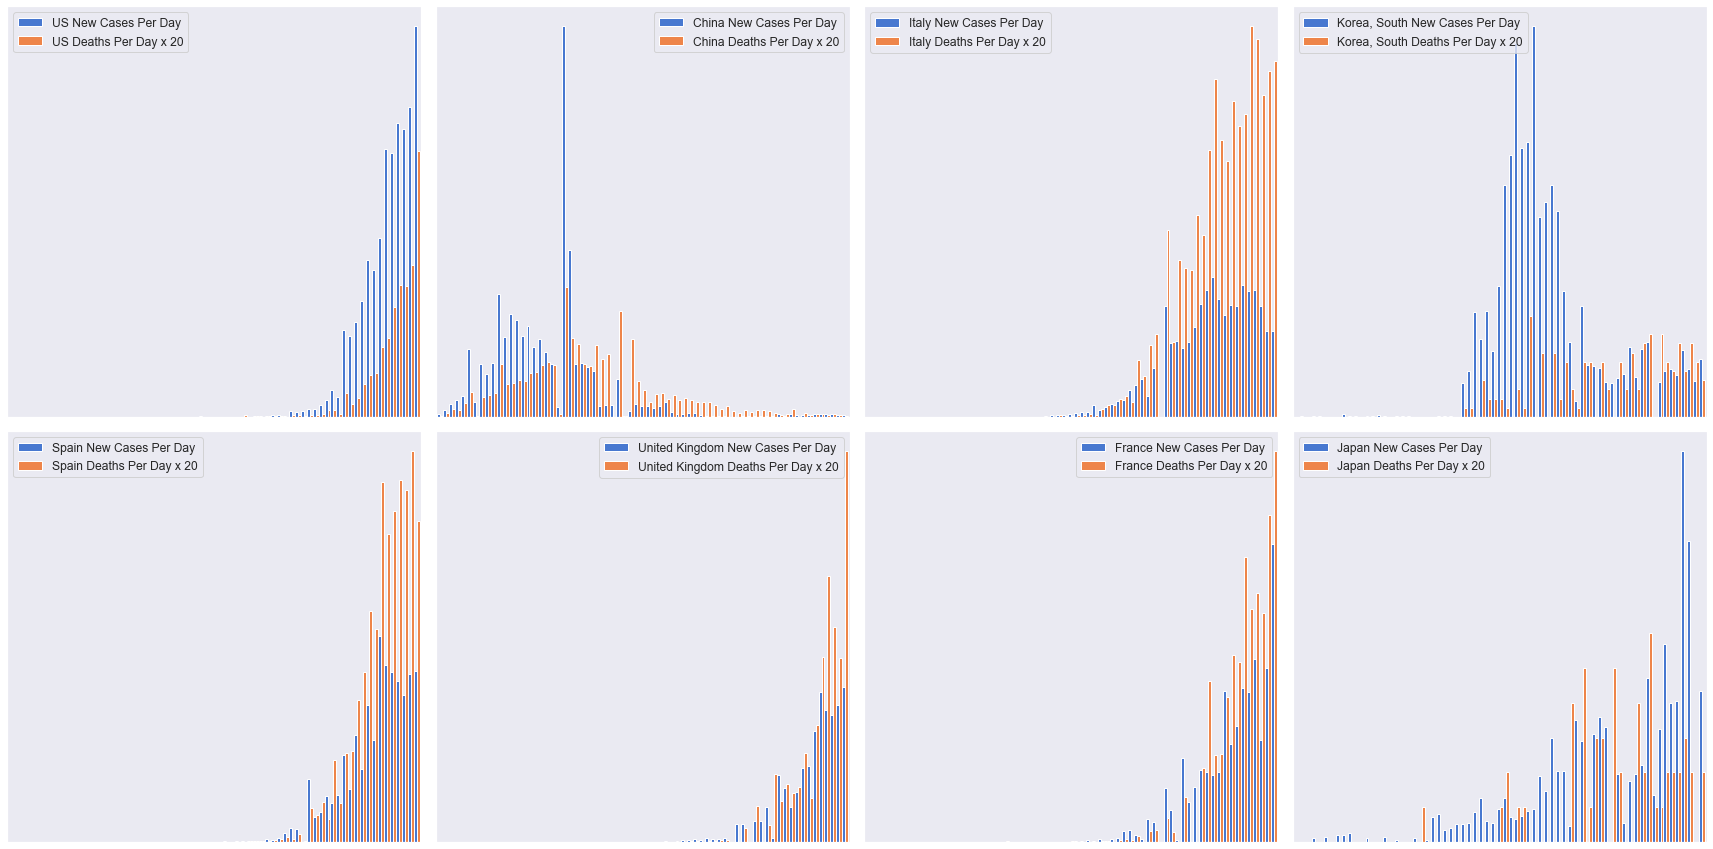

In [188]:
#This plot looks at deaths per day and new cases per day vs. cumulative - for US and China

C3 = confirmed.drop(confirmed.columns[[0,2,3,-1]], axis = 1)
D3 = deaths.drop(deaths.columns[[0,2,3,-1]], axis = 1)
R3 = recoveries.drop(recoveries.columns[[0,2,3,-1]], axis = 1)
#sum up values to 1 value per day per country
C4 = C3.groupby('Country/Region').sum().transpose()
D4 = D3.groupby('Country/Region').sum().transpose()
R4 = R3.groupby('Country/Region').sum().transpose()
#parse the datetime fields
C4.index = pd.to_datetime(C4.index)
D4.index = pd.to_datetime(D4.index)
R4.index = pd.to_datetime(R4.index)

US = pd.DataFrame({'US New Cases Per Day':USNewCasesPerDay,'US Deaths Per Day x 20':USDeathsPerDay*20})

def CvsD(country):
    CountryDeathsPerDay = D4[country][1:] - D4[country][:-1].values
    CountryCasesPerDay = C4[country][1:] - C4[country][:-1].values
    Country = pd.DataFrame({country + ' New Cases Per Day':CountryCasesPerDay,country + ' Deaths Per Day x 20':CountryDeathsPerDay*20})
    return Country

def CvsR(country):
    CountryCasesPerDay = C4[country][1:] - C4[country][:-1].values
    CountryRecoveriesPerDay = R4[country][1:] - R4[country][:-1].values
    Country = pd.DataFrame({country + ' New Cases Per Day':CountryCasesPerDay, country + ' Recoveries Per Day':CountryRecoveriesPerDay})
    return Country

def CvsDvsR(country):
    CountryDeathsPerDay = D4[country][1:] - D4[country][:-1].values
    CountryCasesPerDay = C4[country][1:] - C4[country][:-1].values
    CountryRecoveriesPerDay = R4[country][1:] - R4[country][:-1].values
    Country = pd.DataFrame({country + ' New Cases Per Day':CountryCasesPerDay,country + ' Deaths Per Day x 20':CountryDeathsPerDay*20, country + ' Recoveries Per Day':CountryRecoveriesPerDay})
    return Country

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale = 1.1)

#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsD('US').plot(kind='bar', ax=axarr1, width=1)
CvsD('China').plot(kind='bar', ax=axarr2, width=1)
CvsD('Italy').plot(kind='bar', ax=axarr3, width=1)
CvsD('Korea, South').plot(kind='bar', ax=axarr4, width=1)
CvsD('Spain').plot(kind='bar', ax=axarr5, width=1)
CvsD('United Kingdom').plot(kind='bar', ax=axarr6, width=1)
CvsD('France').plot(kind='bar', ax=axarr7, width=1)
CvsD('Japan').plot(kind='bar', ax=axarr8, width=1)
axarr1.axes.get_xaxis().set_ticks([])
axarr1.axes.get_yaxis().set_ticks([])
axarr2.axes.get_xaxis().set_ticks([])
axarr2.axes.get_yaxis().set_ticks([])
axarr3.axes.get_xaxis().set_ticks([])
axarr3.axes.get_yaxis().set_ticks([])
axarr4.axes.get_xaxis().set_ticks([])
axarr4.axes.get_yaxis().set_ticks([])
axarr5.axes.get_xaxis().set_ticks([])
axarr5.axes.get_yaxis().set_ticks([])
axarr6.axes.get_xaxis().set_ticks([])
axarr6.axes.get_yaxis().set_ticks([])
axarr7.axes.get_xaxis().set_ticks([])
axarr7.axes.get_yaxis().set_ticks([])
axarr8.axes.get_xaxis().set_ticks([])
axarr8.axes.get_yaxis().set_ticks([])
#axarr2.get_shared_y_axes().join(axarr1, axarr2)
# axarr2.get_shared_y_axes().join(axarr2, axarr4)

plt.tight_layout()


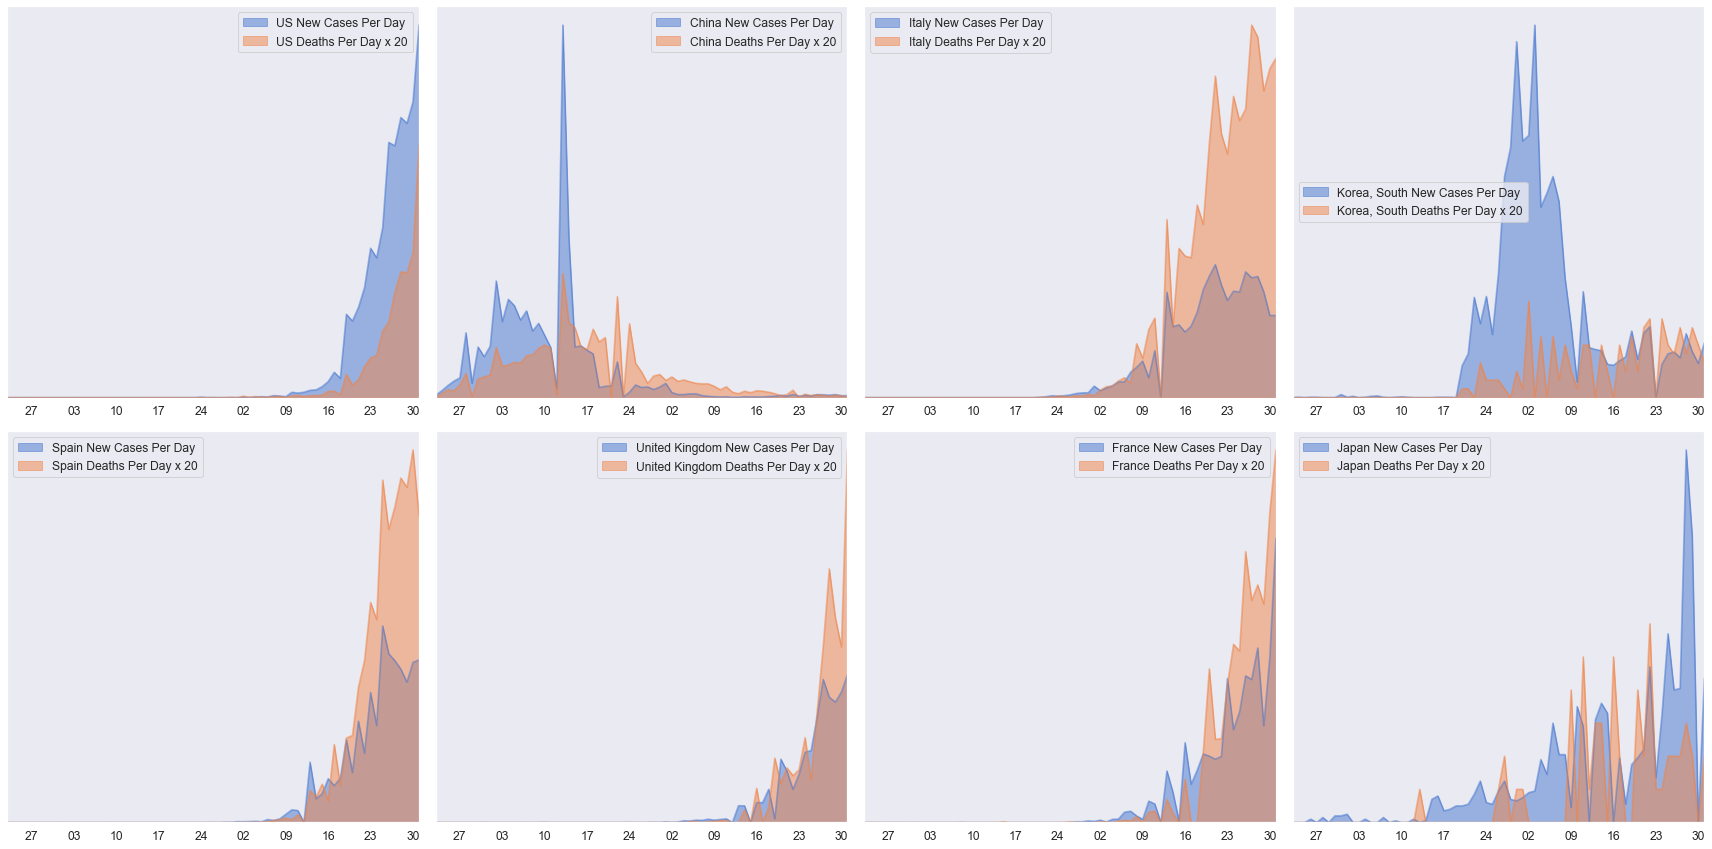

In [189]:
#look at distribution of cases per day vs daths per day (x20 for simple visual comparison) by date and by country
#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsD('US').plot(kind='area', ax=axarr1, stacked=False, alpha=0.5)
CvsD('China').plot(kind='area', ax=axarr2, stacked=False, alpha=0.5)
CvsD('Italy').plot(kind='area', ax=axarr3, stacked=False, alpha=0.5)
CvsD('Korea, South').plot(kind='area', ax=axarr4, stacked=False, alpha=0.5)
CvsD('Spain').plot(kind='area', ax=axarr5, stacked=False, alpha=0.5)
CvsD('United Kingdom').plot(kind='area', ax=axarr6, stacked=False, alpha=0.5)
CvsD('France').plot(kind='area', ax=axarr7, stacked=False, alpha=0.5)
CvsD('Japan').plot(kind='area', ax=axarr8, stacked=False, alpha=0.5)
axarr1.axes.get_xaxis().set_ticks([])
axarr1.axes.get_yaxis().set_ticks([])
axarr2.axes.get_xaxis().set_ticks([])
axarr2.axes.get_yaxis().set_ticks([])
axarr3.axes.get_xaxis().set_ticks([])
axarr3.axes.get_yaxis().set_ticks([])
axarr4.axes.get_xaxis().set_ticks([])
axarr4.axes.get_yaxis().set_ticks([])
axarr5.axes.get_xaxis().set_ticks([])
axarr5.axes.get_yaxis().set_ticks([])
axarr6.axes.get_xaxis().set_ticks([])
axarr6.axes.get_yaxis().set_ticks([])
axarr7.axes.get_xaxis().set_ticks([])
axarr7.axes.get_yaxis().set_ticks([])
axarr8.axes.get_xaxis().set_ticks([])
axarr8.axes.get_yaxis().set_ticks([])
#axarr2.get_shared_y_axes().join(axarr1, axarr2)
# axarr2.get_shared_y_axes().join(axarr2, axarr4)

plt.tight_layout()

fig.savefig('charts/20200331-covid19-comparison-chart.png')

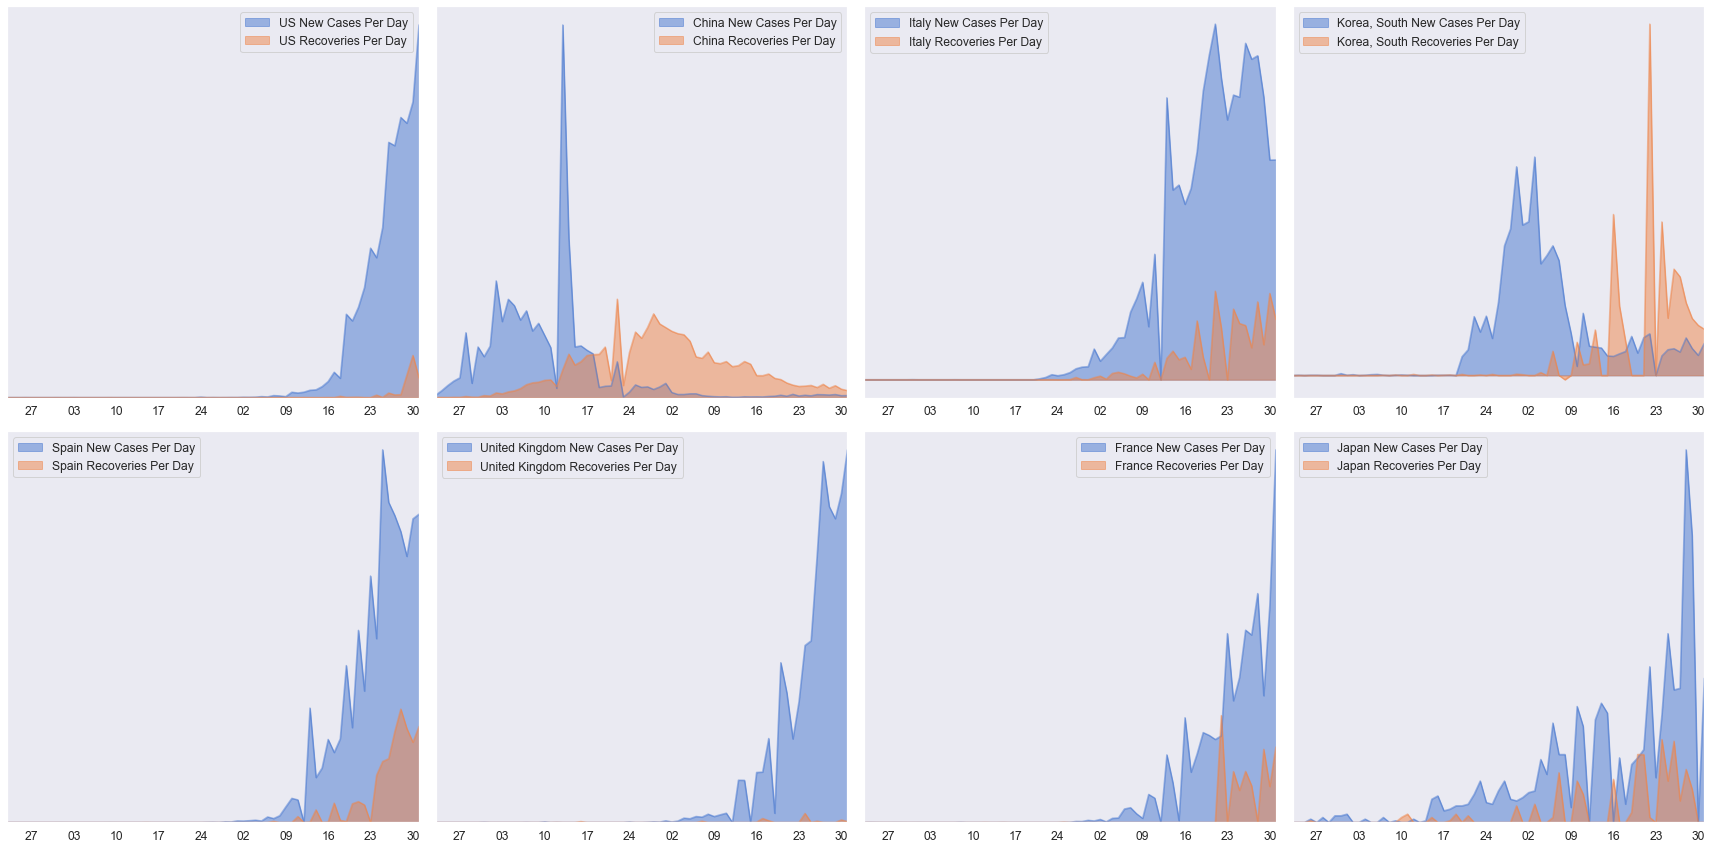

In [190]:
#look at per day distribution of cases vs recovery by date and by country
#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsR('US').plot(kind='area', ax=axarr1, stacked=False, alpha=0.5)
CvsR('China').plot(kind='area', ax=axarr2, stacked=False, alpha=0.5)
CvsR('Italy').plot(kind='area', ax=axarr3, stacked=False, alpha=0.5)
CvsR('Korea, South').plot(kind='area', ax=axarr4, stacked=False, alpha=0.5)
CvsR('Spain').plot(kind='area', ax=axarr5, stacked=False, alpha=0.5)
CvsR('United Kingdom').plot(kind='area', ax=axarr6, stacked=False, alpha=0.5)
CvsR('France').plot(kind='area', ax=axarr7, stacked=False, alpha=0.5)
CvsR('Japan').plot(kind='area', ax=axarr8, stacked=False, alpha=0.5)
axarr1.axes.get_xaxis().set_ticks([])
axarr1.axes.get_yaxis().set_ticks([])
axarr2.axes.get_xaxis().set_ticks([])
axarr2.axes.get_yaxis().set_ticks([])
axarr3.axes.get_xaxis().set_ticks([])
axarr3.axes.get_yaxis().set_ticks([])
axarr4.axes.get_xaxis().set_ticks([])
axarr4.axes.get_yaxis().set_ticks([])
axarr5.axes.get_xaxis().set_ticks([])
axarr5.axes.get_yaxis().set_ticks([])
axarr6.axes.get_xaxis().set_ticks([])
axarr6.axes.get_yaxis().set_ticks([])
axarr7.axes.get_xaxis().set_ticks([])
axarr7.axes.get_yaxis().set_ticks([])
axarr8.axes.get_xaxis().set_ticks([])
axarr8.axes.get_yaxis().set_ticks([])
#axarr2.get_shared_y_axes().join(axarr1, axarr2)
# axarr2.get_shared_y_axes().join(axarr2, axarr4)

plt.tight_layout()

fig.savefig('charts/20200331-covid19-comparison-recovery-chart.png')

In [201]:
#Let's look at US State Data from NY Times (from: https://github.com/nytimes/covid-19-data)
states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
states['date'] = pd.to_datetime(states['date'])

In [211]:
SD = pd.pivot_table(states, values='deaths', index=['date'], columns=['state'], aggfunc=np.sum).fillna(0)
SC = pd.pivot_table(states, values='cases', index=['date'], columns=['state'], aggfunc=np.sum).fillna(0)
def CvsDS(state):
    State = pd.DataFrame({state + ' New Cases Per Day':SC[state],state + ' Deaths Per Day x 20':SD[state]*20})
    return State

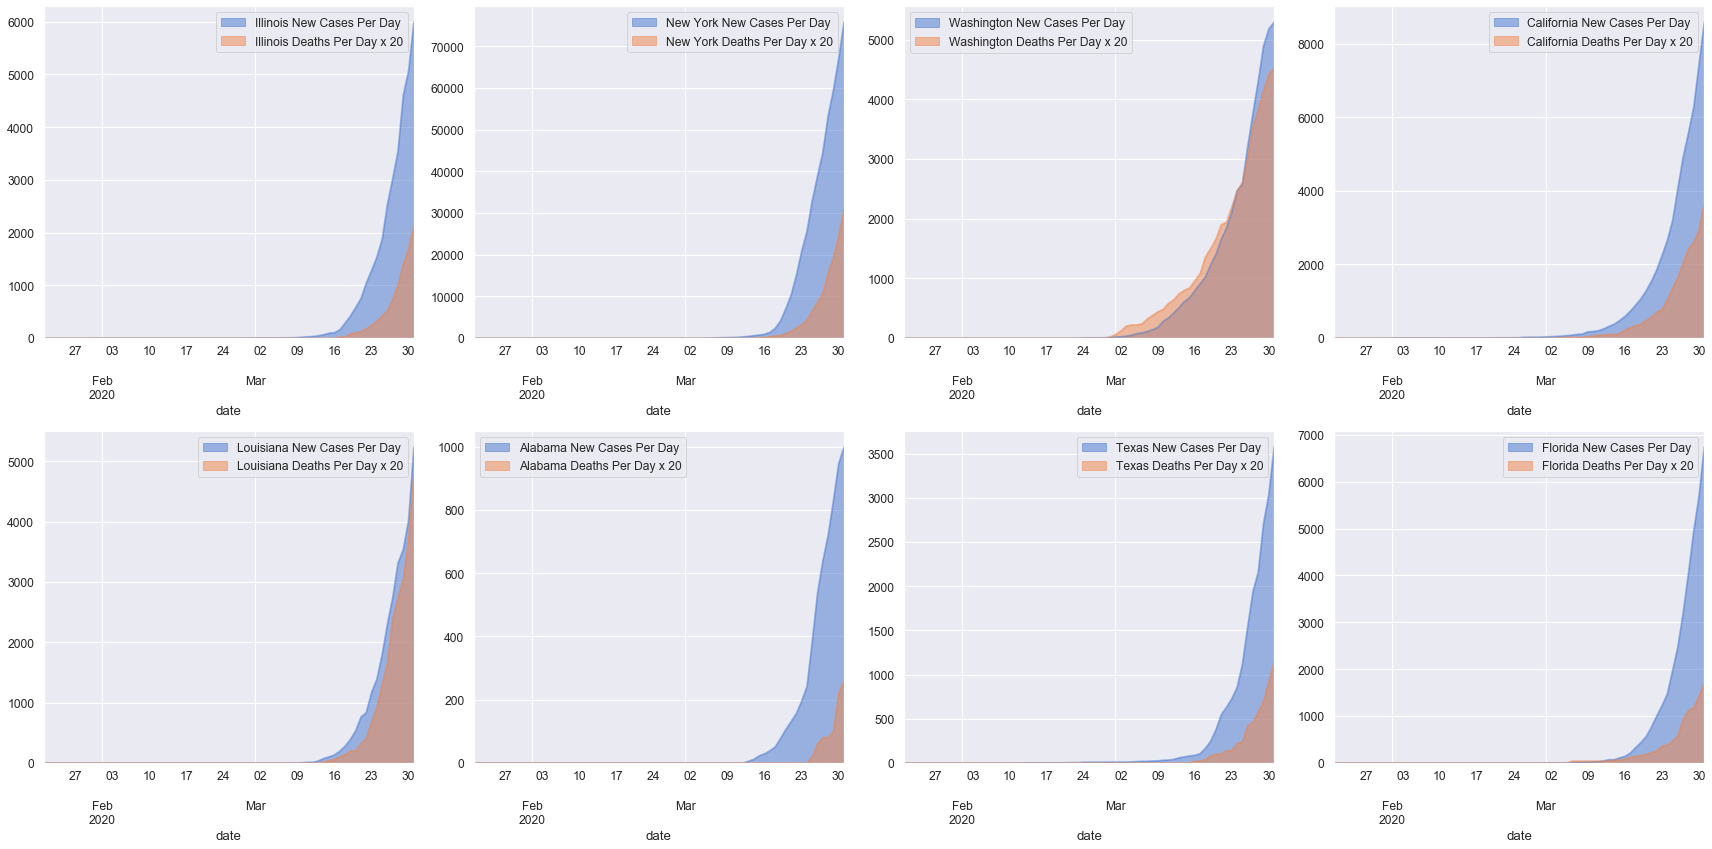

In [213]:
#look at per day distribution of cases vs recovery by date and by select US states
#Set up plot
fig, ((axarr1, axarr2, axarr3, axarr4), (axarr5, axarr6, axarr7, axarr8)) = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

plt.subplots_adjust(hspace=-1) 
sns.set_palette(sns.color_palette("muted",7))

#plot stacked area chart of deaths
CvsDS('Illinois').plot(kind='area', ax=axarr1, stacked=False, alpha=0.5)
CvsDS('New York').plot(kind='area', ax=axarr2, stacked=False, alpha=0.5)
CvsDS('Washington').plot(kind='area', ax=axarr3, stacked=False, alpha=0.5)
CvsDS('California').plot(kind='area', ax=axarr4, stacked=False, alpha=0.5)
CvsDS('Louisiana').plot(kind='area', ax=axarr5, stacked=False, alpha=0.5)
CvsDS('Alabama').plot(kind='area', ax=axarr6, stacked=False, alpha=0.5)
CvsDS('Texas').plot(kind='area', ax=axarr7, stacked=False, alpha=0.5)
CvsDS('Florida').plot(kind='area', ax=axarr8, stacked=False, alpha=0.5)
# axarr1.axes.get_xaxis().set_ticks([])
# axarr1.axes.get_yaxis().set_ticks([])
# axarr2.axes.get_xaxis().set_ticks([])
# axarr2.axes.get_yaxis().set_ticks([])
# axarr3.axes.get_xaxis().set_ticks([])
# axarr3.axes.get_yaxis().set_ticks([])
# axarr4.axes.get_xaxis().set_ticks([])
# axarr4.axes.get_yaxis().set_ticks([])
# axarr5.axes.get_xaxis().set_ticks([])
# axarr5.axes.get_yaxis().set_ticks([])
# axarr6.axes.get_xaxis().set_ticks([])
# axarr6.axes.get_yaxis().set_ticks([])
# axarr7.axes.get_xaxis().set_ticks([])
# axarr7.axes.get_yaxis().set_ticks([])
# axarr8.axes.get_xaxis().set_ticks([])
# axarr8.axes.get_yaxis().set_ticks([])
#axarr2.get_shared_y_axes().join(axarr1, axarr2)
# axarr2.get_shared_y_axes().join(axarr2, axarr4)

plt.tight_layout()

fig.savefig('charts/20200331-covid19-states.png')